In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import numpy as np

In [2]:
topics19 = "goog_csvs/2019_topic.csv"
topics20 = "goog_csvs/topics_2020.csv"
guns19 = "goog_csvs/2019_guns.csv"
guns20 = "goog_csvs/guns_2020.csv"
germs19 = "goog_csvs/2019_germs.csv"
germs20 = "goog_csvs/germs_2020.csv"
rec19 = "goog_csvs/2019_rec.csv"
rec20 = "goog_csvs/rec_2020.csv"

In [3]:
# Read the mouse data and the study results
topics19 = pd.read_csv(topics19)
topics20 = pd.read_csv(topics20)
guns19 = pd.read_csv(guns19)
guns20 = pd.read_csv(guns20)
germs19 = pd.read_csv(germs19)
germs20 = pd.read_csv(germs20)
rec19 = pd.read_csv(rec19)
rec20 = pd.read_csv(rec20)

In [4]:
topics19.head()

,Unnamed: 0,date,guns,virus,boredom
0,194,2019-01-06,46,2,26
1,195,2019-01-13,46,2,25
2,196,2019-01-20,46,2,26
3,197,2019-01-27,45,2,29
4,198,2019-02-03,45,2,25


In [5]:
topics19 = topics19.drop(topics19.columns[[0]], axis=1)
topics19.set_index('date')
topics19.head()

,date,guns,virus,boredom
0,2019-01-06,46,2,26
1,2019-01-13,46,2,25
2,2019-01-20,46,2,26
3,2019-01-27,45,2,29
4,2019-02-03,45,2,25


In [6]:
topics20.head()

,Unnamed: 0,date,guns,virus,boredom
0,246,2020-01-05,46,2,26
1,247,2020-01-12,47,2,26
2,248,2020-01-19,47,14,31
3,249,2020-01-26,45,33,27
4,250,2020-02-02,52,18,23


In [7]:
topics20 = topics20.drop(topics20.columns[[0]], axis=1)
topics20.set_index('date')
topics20.head()

,date,guns,virus,boredom
0,2020-01-05,46,2,26
1,2020-01-12,47,2,26
2,2020-01-19,47,14,31
3,2020-01-26,45,33,27
4,2020-02-02,52,18,23


In [8]:
guns19.head()

,Unnamed: 0,date,ammo,gun stores,ar15
0,194,2019-01-06,28,9,23
1,195,2019-01-13,29,8,23
2,196,2019-01-20,29,10,24
3,197,2019-01-27,32,11,24
4,198,2019-02-03,29,10,24


In [9]:
guns19 = guns19.drop(guns19.columns[[0]], axis=1)
guns19.set_index('date')
guns19.head()

,date,ammo,gun stores,ar15
0,2019-01-06,28,9,23
1,2019-01-13,29,8,23
2,2019-01-20,29,10,24
3,2019-01-27,32,11,24
4,2019-02-03,29,10,24


In [10]:
guns20.head()

,Unnamed: 0,date,ammo,gun stores,ar15
0,246,2020-01-05,32,14,27
1,247,2020-01-12,30,13,26
2,248,2020-01-19,29,13,25
3,249,2020-01-26,30,12,25
4,250,2020-02-02,28,13,24


In [11]:
guns20 = guns20.drop(guns20.columns[[0]], axis=1)
guns20.set_index('date')
guns20.head()

,date,ammo,gun stores,ar15
0,2020-01-05,32,14,27
1,2020-01-12,30,13,26
2,2020-01-19,29,13,25
3,2020-01-26,30,12,25
4,2020-02-02,28,13,24


In [12]:
germs19.head()

,Unnamed: 0,date,disinfectant,bleach,toilet paper
0,194,2019-01-06,3,42,3
1,195,2019-01-13,3,41,3
2,196,2019-01-20,3,41,3
3,197,2019-01-27,3,42,3
4,198,2019-02-03,3,42,3


In [13]:
germs19 = germs19.drop(germs19.columns[[0]], axis=1)
germs19.set_index('date')
germs19.head()

,date,disinfectant,bleach,toilet paper
0,2019-01-06,3,42,3
1,2019-01-13,3,41,3
2,2019-01-20,3,41,3
3,2019-01-27,3,42,3
4,2019-02-03,3,42,3


In [14]:
germs20.head()

,Unnamed: 0,date,disinfectant,bleach,toilet paper
0,246,2020-01-05,4,38,3
1,247,2020-01-12,4,39,3
2,248,2020-01-19,4,40,3
3,249,2020-01-26,8,42,3
4,250,2020-02-02,8,41,3


In [15]:
germs20 = germs20.drop(germs20.columns[[0]], axis=1)
germs20.set_index('date')
germs20.head()

,date,disinfectant,bleach,toilet paper
0,2020-01-05,4,38,3
1,2020-01-12,4,39,3
2,2020-01-19,4,40,3
3,2020-01-26,8,42,3
4,2020-02-02,8,41,3


In [16]:
rec19.head()

,Unnamed: 0,date,netflix,porn,diy
0,194,2019-01-06,58,74,55
1,195,2019-01-13,57,72,54
2,196,2019-01-20,55,73,54
3,197,2019-01-27,53,73,54
4,198,2019-02-03,47,72,55


In [17]:
rec19 = rec19.drop(rec19.columns[[0]], axis=1)
rec19.set_index('date')
rec19.head()

,date,netflix,porn,diy
0,2019-01-06,58,74,55
1,2019-01-13,57,72,54
2,2019-01-20,55,73,54
3,2019-01-27,53,73,54
4,2019-02-03,47,72,55


In [18]:
rec20.head()

,Unnamed: 0,date,netflix,porn,diy
0,246,2020-01-05,58,75,52
1,247,2020-01-12,54,73,54
2,248,2020-01-19,54,73,52
3,249,2020-01-26,51,72,51
4,250,2020-02-02,49,72,53


In [19]:
rec20 = rec20.drop(rec20.columns[[0]], axis=1)
rec20.set_index('date')
rec20.head()

,date,netflix,porn,diy
0,2020-01-05,58,75,52
1,2020-01-12,54,73,54
2,2020-01-19,54,73,52
3,2020-01-26,51,72,51
4,2020-02-02,49,72,53


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text xticklabel objects>)

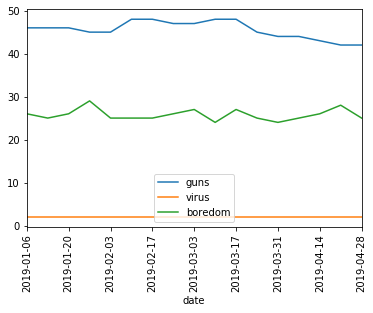

In [20]:
topics19.plot(x="date", y=["guns", "virus", "boredom"], kind="line")
plt.xticks(rotation=90)

In [21]:
# guns 2019 chi square test - non-significant
stats.chisquare(topics19["guns"])

Power_divergenceResult(statistic=1.454780361757106, pvalue=0.9999989790784526)

In [22]:
# virus 2019 chi square test - non-significant
stats.chisquare(topics19["virus"])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [23]:
# boredom 2019 chi square test - non-significant
stats.chisquare(topics19["boredom"])

Power_divergenceResult(statistic=1.1278538812785386, pvalue=0.9999998460907584)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text xticklabel objects>)

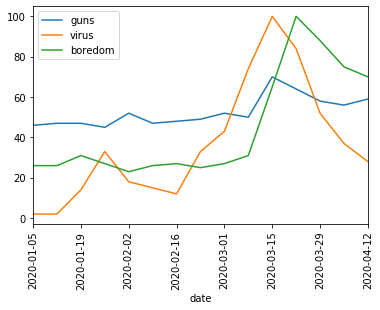

In [24]:
topics20.plot(x="date", y=["guns", "virus", "boredom"], kind="line")
plt.xticks(rotation=90)

In [25]:
# guns 2020 chi square test - non-significant
stats.chisquare(topics20["guns"])

Power_divergenceResult(statistic=14.265822784810126, pvalue=0.4301006894688279)

In [26]:
# virus 2020 chi square test - significant
stats.chisquare(topics20["virus"])

Power_divergenceResult(statistic=339.09689213893967, pvalue=7.943776891955277e-64)

In [27]:
# boredom 2020 chi square test - non-significant
stats.chisquare(topics19["boredom"])

Power_divergenceResult(statistic=1.1278538812785386, pvalue=0.9999998460907584)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text xticklabel objects>)

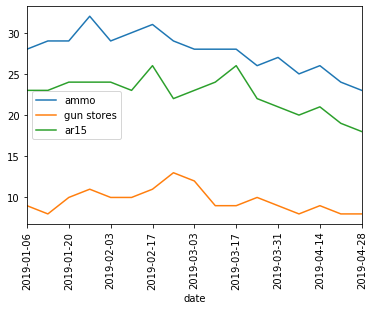

In [28]:
guns19.plot(x="date", y=["ammo", "gun stores", "ar15"], kind="line")
plt.xticks(rotation=90)

In [29]:
# ammo 2019 chi square test - non-significant
stats.chisquare(guns19["ammo"])

Power_divergenceResult(statistic=3.2796610169491527, pvalue=0.9996937508121061)

In [30]:
# gun stores 2019 chi square test - non-significant
stats.chisquare(guns19["gun stores"])

Power_divergenceResult(statistic=3.51219512195122, pvalue=0.999521208058992)

In [31]:
# ar15 2019 chi square test - non-significant (it should be ar 15, not ar15)
stats.chisquare(guns19["ar15"])

Power_divergenceResult(statistic=3.472584856396866, pvalue=0.9995551456881598)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text xticklabel objects>)

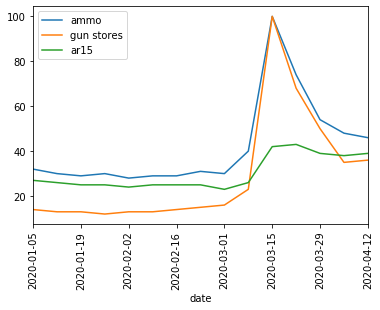

In [32]:
guns20.plot(x="date", y=["ammo", "gun stores", "ar15"], kind="line")
plt.xticks(rotation=90)

In [33]:
# ammo 2020 chi square test - significant
stats.chisquare(guns20["ammo"])

Power_divergenceResult(statistic=141.52380952380952, pvalue=3.5305207460532705e-23)

In [34]:
# gun stores 2020 chi square test - significant
stats.chisquare(guns20["gun stores"])

Power_divergenceResult(statistic=319.03448275862064, pvalue=1.254864907367869e-59)

In [35]:
# ar15 2020 chi square test - significant (it should be ar 15, not ar15)
stats.chisquare(guns20["ar15"])

Power_divergenceResult(statistic=26.207964601769913, pvalue=0.024354663967811562)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text xticklabel objects>)

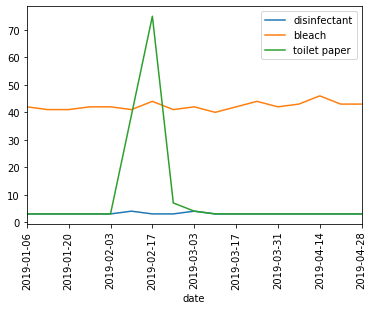

In [36]:
germs19.plot(x="date", y=["disinfectant", "bleach", "toilet paper"], kind="line")
plt.xticks(rotation=90)

In [37]:
# disinfectant 2019 chi square test - non-significant
stats.chisquare(germs19["disinfectant"])

Power_divergenceResult(statistic=0.5660377358490566, pvalue=0.9999999992058176)

In [38]:
# bleach 2019 chi square test - non-significant
stats.chisquare(germs19["bleach"])

Power_divergenceResult(statistic=0.7927677329624478, pvalue=0.999999989365165)

In [39]:
# toilet paper 2019 chi square test - significant
stats.chisquare(germs19["toilet paper"])

Power_divergenceResult(statistic=595.6097560975611, pvalue=1.9515124095876433e-116)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text xticklabel objects>)

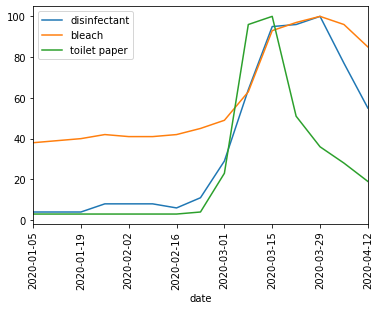

In [40]:
germs20.plot(x="date", y=["disinfectant", "bleach", "toilet paper"], kind="line")
plt.xticks(rotation=90)

In [41]:
# disinfectant 2020 chi square test - significant
stats.chisquare(germs20["disinfectant"])

Power_divergenceResult(statistic=552.1511423550088, pvalue=7.94777290908819e-109)

In [42]:
# bleach 2020 chi square test - significant
stats.chisquare(germs20["bleach"])

Power_divergenceResult(statistic=148.53347969264544, pvalue=1.412022888700106e-24)

In [43]:
# toilet paper 2020 chi square test - significant
stats.chisquare(germs20["toilet paper"])

Power_divergenceResult(statistic=608.7460317460316, pvalue=7.3147702134474045e-121)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text xticklabel objects>)

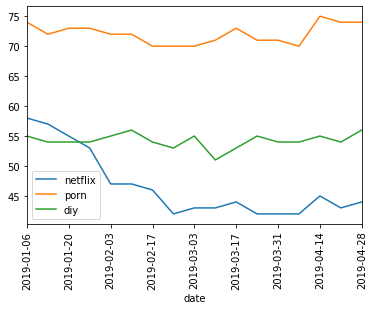

In [44]:
rec19.plot(x="date", y=["netflix", "porn", "diy"], kind="line")
plt.xticks(rotation=90)

In [45]:
# netflix 2019 chi square test - non-significant
stats.chisquare(rec19["netflix"])

Power_divergenceResult(statistic=10.501891551071878, pvalue=0.8391385503364953)

In [46]:
# porn 2019 chi square test - non-significant
stats.chisquare(rec19["porn"])

Power_divergenceResult(statistic=0.5959183673469387, pvalue=0.9999999988172232)

In [47]:
# diy 2019 chi square test - non-significant
stats.chisquare(rec19["diy"])

Power_divergenceResult(statistic=0.4251626898047723, pvalue=0.9999999999143527)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text xticklabel objects>)

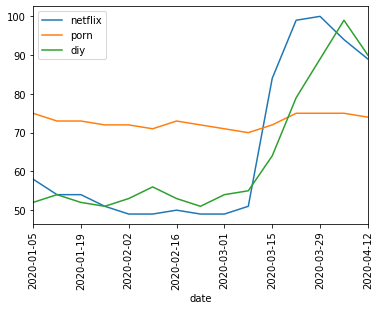

In [48]:
rec20.plot(x="date", y=["netflix", "porn", "diy"], kind="line")
plt.xticks(rotation=90)

In [49]:
# netflix 2020 chi square test - significant
stats.chisquare(rec20["netflix"])

Power_divergenceResult(statistic=93.20408163265307, pvalue=9.385317781817394e-14)

In [50]:
# porn 2020 chi square test - non-significant
stats.chisquare(rec20["porn"])

Power_divergenceResult(statistic=0.5178408051235134, pvalue=0.9999999876541537)

In [51]:
# diy 2020 chi square test - significant
stats.chisquare(rec20["diy"])

Power_divergenceResult(statistic=62.390756302521005, pvalue=4.448952029645612e-08)